### Implementation of the Mandelbrot Set

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cmath
from concurrent.futures import ThreadPoolExecutor, as_completed

# z_n+1 = z^2 + c
def mandelbrot(z, c):
    return add_complex(square_complex(z), c)

# (a + bi)^2 = a^2 - b^2 + 2abi
def square_complex(z):
    return complex(z.real**2 - z.imag**2, 2*z.real*z.imag)

# a+bi + c+di = a+b + (b+d)i
def add_complex(z1, z2):
    return complex(z1.real + z2.real, z1.imag + z2.imag)

# |z| = sqrt(a^2 + b^2)
def magnitude_complex(z):
    return np.sqrt(z.real**2 + z.imag**2)

In [ ]:
def mandelbrot_plot(resolution, max_length_set, re_min, re_max, im_min, im_max):
    # suggestie is om re_min, re_max, im_min en im_max optional arguments te geven. Aangezien we steeds dezelfde range gebruiken.
    real_range = np.linspace(re_min, re_max, resolution)
    imaginary_range = np.linspace(im_min, im_max, resolution)
    mat = np.full((resolution, resolution), max_length_set) # creates a matrix which will represent the mandalbrot plot

    # creates a contour plot in a horizontal direction.
    for i, im in enumerate(imaginary_range):
        for j, re in enumerate(real_range):
            c = complex(re, im)
            z = complex(0, 0)

    # checks after how many iteration the complex number diverges. if k=max_lengths_set, then no divergence.
            for k in range(max_length_set):
                z = mandelbrot(z, c)
                if magnitude_complex(z) > 2:
                    mat[i, j] = k
                    break

    return mat

In [31]:
mandelplot = mandelbrot_plot(resolution=2000, max_length_set=100, re_min=-2, re_max=0.6, im_min=-1.25, im_max=1.25)

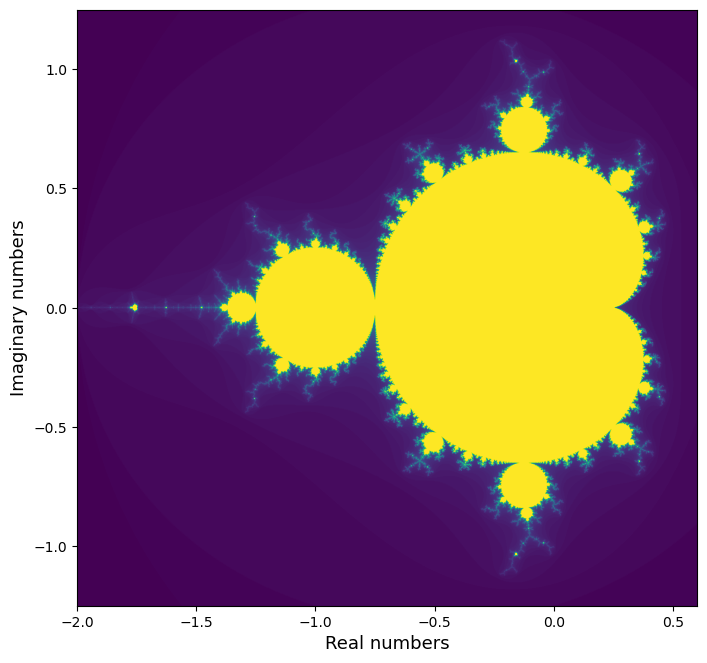

In [32]:
plt.figure(figsize=(8, 8))
plt.imshow(mandelplot, extent=[-2, 0.6, -1.25, 1.25])
plt.xlabel('Real numbers', fontsize=13)
plt.ylabel('Imaginary numbers', fontsize=13)
plt.show()

### Monte Carlo Integration

In [ ]:
def monte_carlo(num_iterations, num_samples, max_length_set, re_min, re_max, im_min, im_max):
   #max length set hernoemen naar convergence criterium
   # num iterations is the number of times the same number of samples is repeated for an average
   areas = np.ndarray(shape=(num_iterations, num_samples))
   # on the third dimension, the coordinates are stored in the [a,b,0] (real) and [a,b,1](imaginary) and if it is within the set, store a 1 (if not a 0) on [,,3]
   sampling = np.ndarray(shape=(num_iterations, num_samples, 3))  # on the third dimension, the coordinates are stored in the [,,0] and [,,1] and if it is within the set, store a 1 (if not a 0) on [,,3]
   area_integration_box = np.abs(re_max-re_min) * np.abs(im_max-im_min)   # suggestion np. abs after the product is sufficient

   for i in range(num_iterations):
      c_re = np.random.uniform(re_min, re_max, num_samples)
      c_im = np.random.uniform(im_min, im_max, num_samples)

      c_random = c_re + 1j * c_im
      points_outside = 0

      for j in range(num_samples):
         z = complex(0,0)

         for k in range(max_length_set):
            z = mandelbrot(z, c_random[j])
            if magnitude_complex(z) > 2:
               sampling[i, j, :] = c_re[j], c_im[j], 0
               points_outside += 1
               break

            sampling[i, j, :] = c_re[j], c_im[j], 1

         areas[i,j] = area_integration_box * (1-(points_outside/(j+1)))

   return areas, sampling


In [3]:
area_mc_sampling = monte_carlo(1, 100000, 100, re_min=-2, re_max=0.6, im_min=-1.25, im_max=1.25)
_, samples = area_mc_sampling

In [ ]:
# Take a single sample from Monte Carlo
sample = samples[0]  #? does this not rather give a single iteration or is it ignored due to it being 1?
x0, y0 = zip(*[ [x, y] for x, y in sample[sample[:, 2] == 1, :2] ]) #suggestion x0 = mc_in_area_x etc.
x1, y1 = zip(*[ [x, y] for x, y in sample[sample[:, 2] == 0, :2] ]) #suggestion x1 = mc_out_area_x etc.

In [ ]:
num_samples = 1000
num_iter = 200
area_mc,_ = monte_carlo(num_iter, num_samples, 100, re_min=-2, re_max=0.6, im_min=-1.25, im_max=1.25)
duration = range(num_samples)  # duration to sample_size_mc, but also why a seperate variable

In [15]:
print(f'Area at {num_samples} samples = {np.mean(area_mc[:,num_samples-1])}')

Area at 1000 samples = 1.5516474999999996


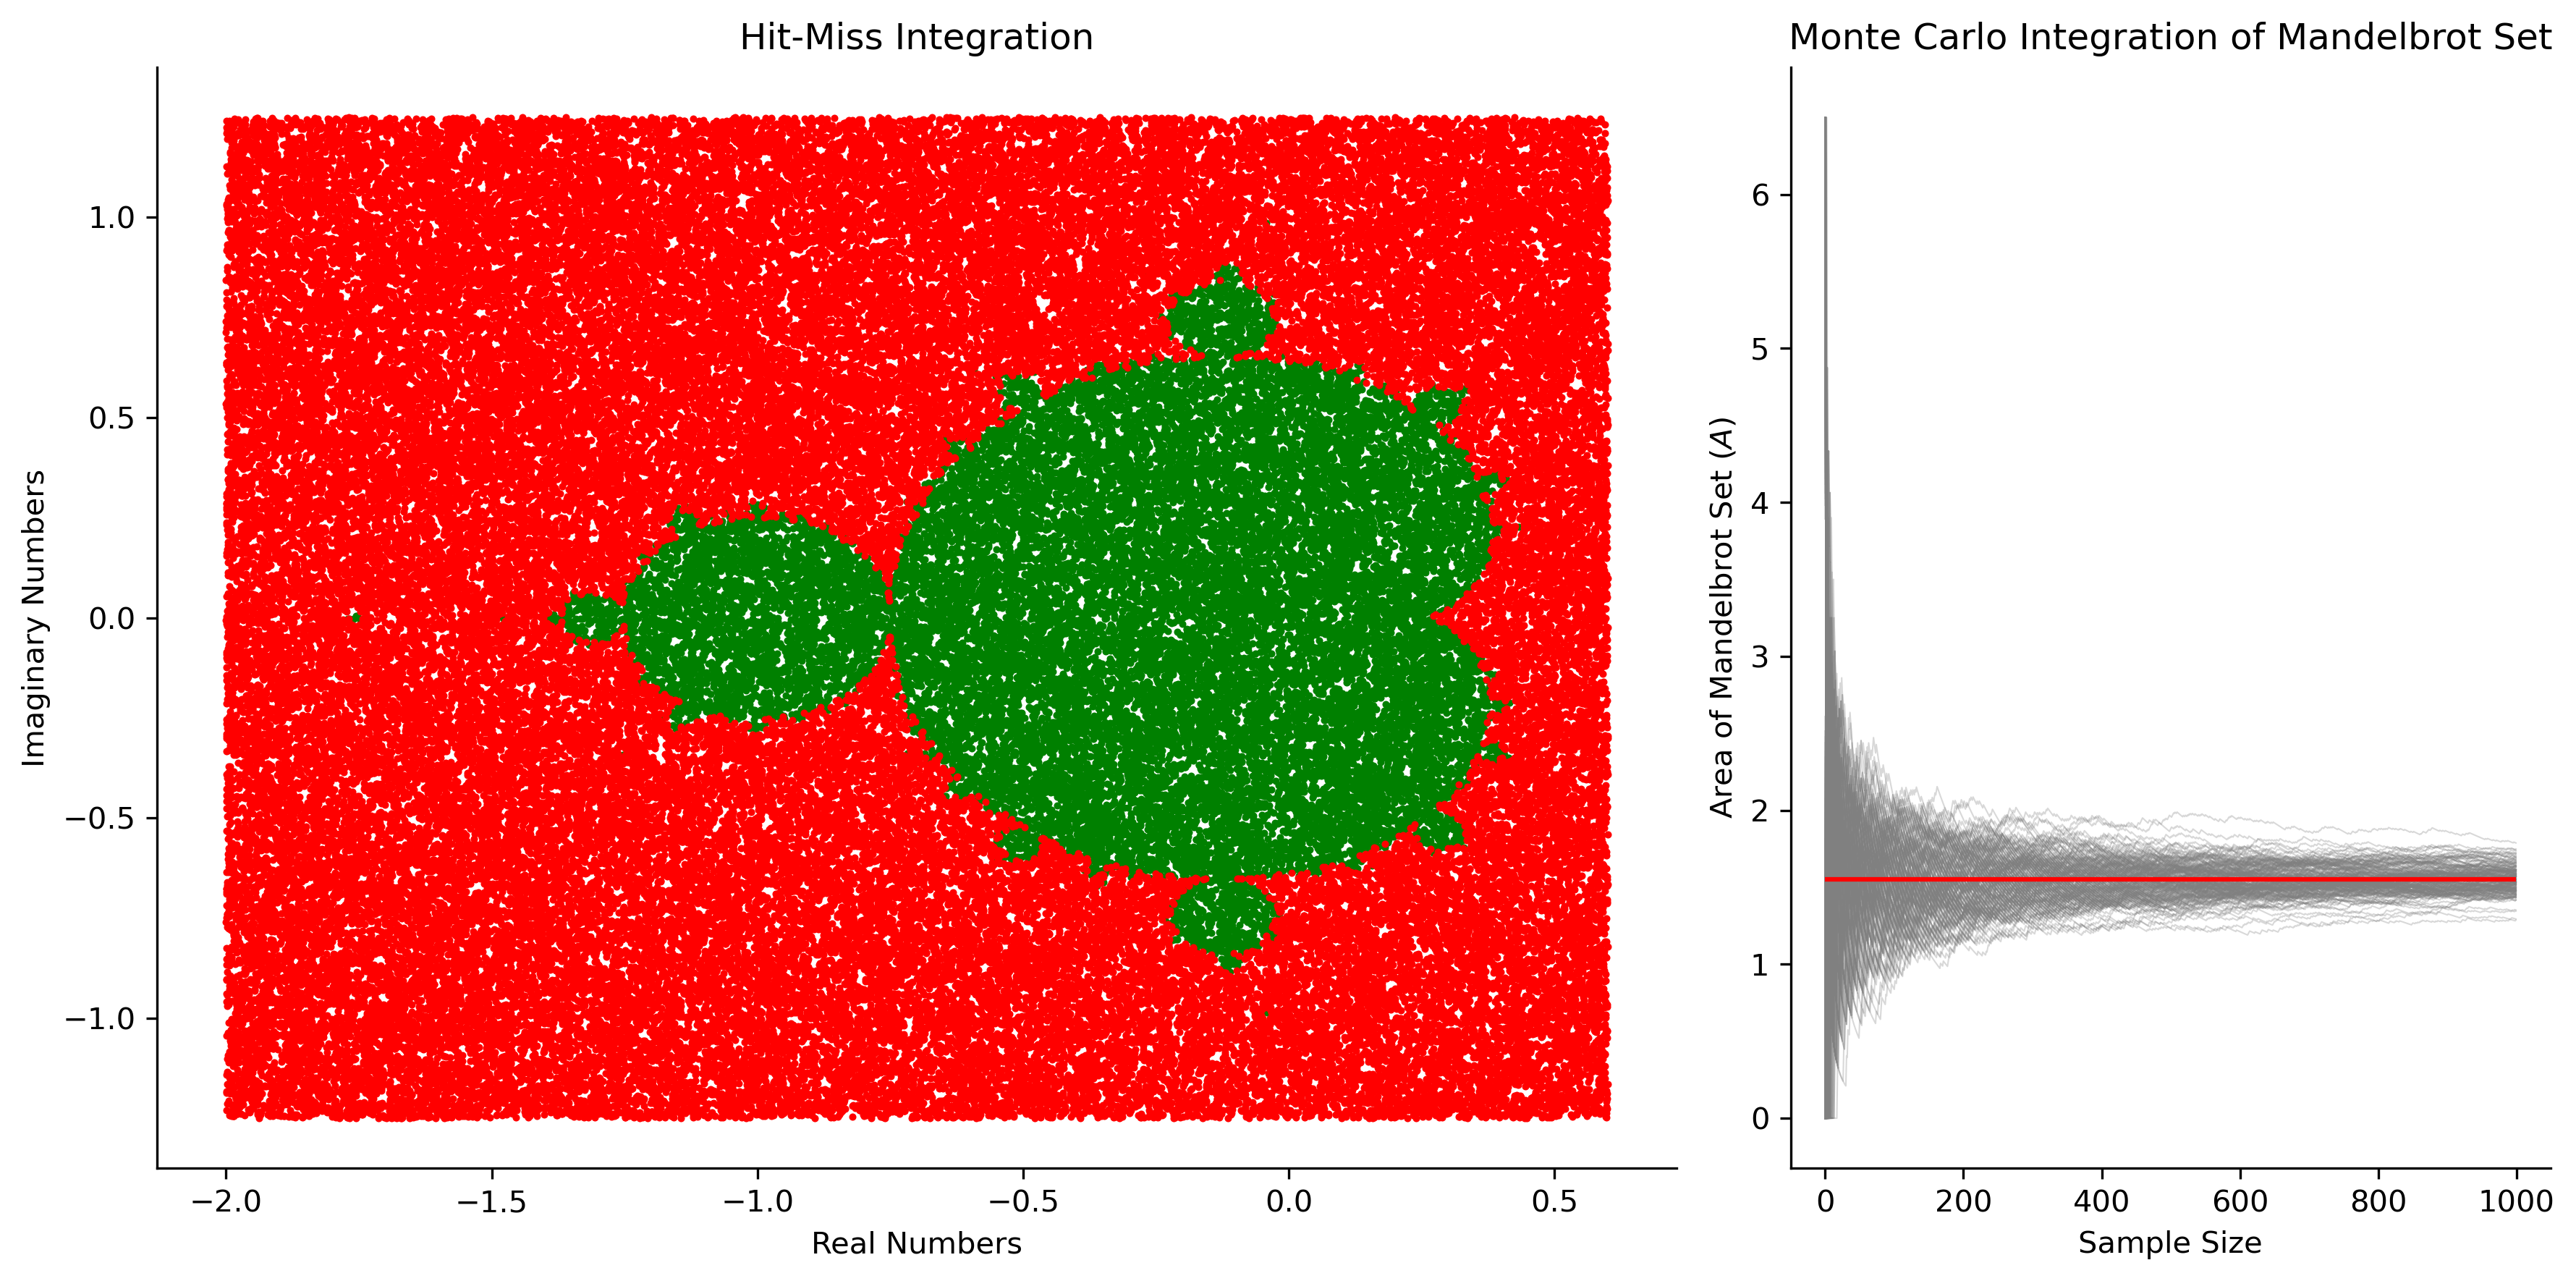

In [ ]:
# Create a figure and use GridSpec to control the plot size ratios
fig = plt.figure(figsize=(12, 6), dpi=300)
gs = GridSpec(1, 2, width_ratios=[2, 1], figure=fig)  # Set width ratio to make second plot smaller

# Subplot 1: Line plot for infection peak reduction
ax1 = fig.add_subplot(gs[0])


ax1.scatter(x = x0, y= y0, color = 'green', s=2)
ax1.scatter(x = x1, y= y1, color = 'red', s=2)

ax1.set_title('Hit-Miss Integration', fontsize=12) #idk of hit-miss de passende naam is? dat nog uitzoeken of zeg mc area simulation mandelbrot
ax1.set_xlabel('Real Numbers')  # real axis
ax1.set_ylabel('Imaginary Numbers') # imaginary axis

ax2 = fig.add_subplot(gs[1])
for i in range(num_iter):
    ax2.plot(duration, area_mc[i], alpha=0.3, color = 'grey', lw =0.5)
#ax2.clabel(contours, inline=True, fontsize=8)
ax2.hlines(np.mean(area_mc[:,num_samples-1]), xmin=0, xmax=num_samples-1, color = 'red') #mby de echte opzoeken op het internet)

ax2.set_ylabel("Area of Mandelbrot Set ($A$)")  #? why $A$? It is not a unit so i think it should go away
ax2.set_xlabel("Sample Size")
ax2.set_title("Monte Carlo Integration of Mandelbrot Set")


# Remove unnecessary spines from both subplots
#? what is a spine?
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Adjust layout for better spacing
plt.tight_layout()

# Save the figure with high resolution (300 DPI)
plt.savefig('combined_plot_with_labels.png', dpi=300)
plt.show()


### Variability as a function of Iterations and Samples

In [3]:
num_samples_values = np.logspace(1, 3, 10).astype(int)
num_iterations_values =  np.logspace(1, 3, 10).astype(int)

# Set up grid to store standard deviations
std_dev_grid = np.zeros((len(num_iterations_values), len(num_samples_values)))

std_dev_grid

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
# Run Monte Carlo simulations for each combination of num_iterations and num_samples
for i, num_iterations in enumerate(num_iterations_values):
    for j, num_samples in enumerate(num_samples_values):
        # Perform the Monte Carlo simulation
        areas, _ = monte_carlo(num_iterations, num_samples, max_length_set=100, re_min=-2, re_max=2, im_min=-2, im_max=2)

        # Calculate standard deviation of areas for the current parameters
        std_dev_grid[i, j] = np.std(areas)

In [13]:
std_dev_grid

array([[1.50646844, 2.27292893, 1.78939901, 1.56915265, 0.98445757,
        0.94459979, 0.84554676, 0.70547179, 0.33650185, 0.43805667],
       [2.43211035, 1.95733851, 2.12908988, 1.6856157 , 1.38806113,
        0.89046618, 0.78783813, 0.75580039, 0.5294679 , 0.36372741],
       [2.24975813, 2.17926864, 2.06836524, 1.574691  , 1.12871527,
        0.94176584, 0.76256075, 0.6150968 , 0.43869765, 0.40744536],
       [2.86900119, 2.05636319, 2.12699985, 1.4142903 , 1.32511561,
        0.90785264, 0.80130797, 0.715266  , 0.58661435, 0.41507042],
       [2.81574344, 2.30088165, 1.7330008 , 1.41041168, 1.06645236,
        1.02404657, 0.7414576 , 0.65030199, 0.50096339, 0.43010046],
       [2.63721267, 1.87286089, 1.86124635, 1.41002778, 1.15332365,
        0.92565677, 0.79614502, 0.65432509, 0.49330583, 0.41481398],
       [2.93457371, 2.23618096, 1.71624289, 1.33516517, 1.24310467,
        0.97049511, 0.80674936, 0.61369077, 0.49287276, 0.39930977],
       [2.47356799, 2.25770833, 1.8396778

In [5]:
X, Y = np.meshgrid(num_samples_values, num_iterations_values)

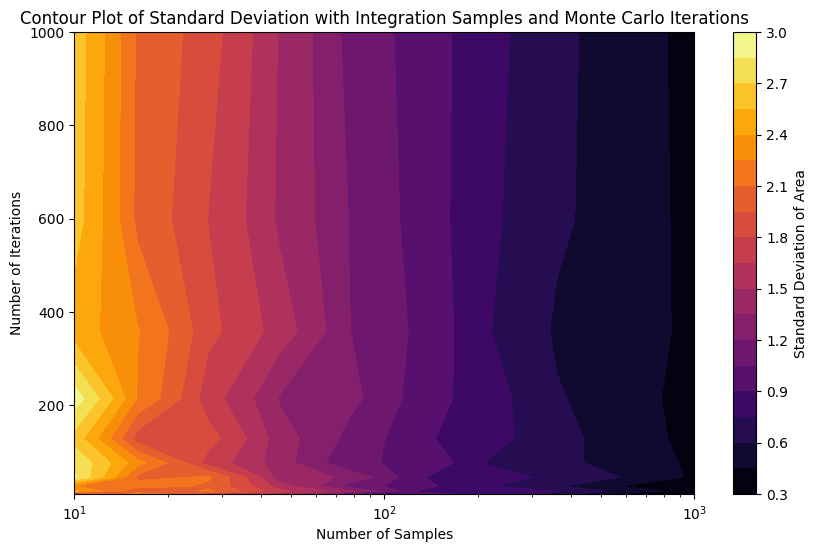

In [15]:
plt.figure(figsize=(10, 6))
contour = plt.contourf(X, Y, std_dev_grid, levels=20, cmap='inferno')
plt.colorbar(contour, label='Standard Deviation of Area')
plt.xlabel('Number of Samples')
plt.ylabel('Number of Iterations')
plt.xscale('log')
#plt.yscale('log')
plt.title('Contour Plot of Standard Deviation with Integration Samples and Monte Carlo Iterations')
plt.show()

if we want to apply p=0.05, we can calculate sqrt n and sigma beforehand to , look into slides for how we can find std if we set n